<a href="https://colab.research.google.com/github/gekaluck/bdml/blob/main/Lecture4_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 4 -- Dealing with Data**
1. Remove and Impute Data 
2. Handling Categorical Data
3. Partitioning into training and test datasets
4. Transformations
5. Feature Importance 
6. Dimensionality Reduction: Principal component analysis (PCA) 
7. Building a Pipeline
8. Learning/Validation curves
9. Grid Search
10. Confusion matrix/ROC-AUC curves
11. SMOTE
12. Ensembles
12. Homework Assignment 4

# **1. Remove and Impute Data**

Many times in practice your data may have missing values. In order to make your data useful certain key decisions will need to be made in the data cleaning process. Over time you will build your intuition on the optimal way to clean data. Often the right way will depend on the task at hand and how much data you have as well as the quality of your data. 

[This article](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e) describes seven ways of handling missing values:
1. Deleting Rows with missing values
2. Impute missing values for continuous variable
3. Impute missing values for categorical variable
4. Other Imputation Methods
5. Using Algorithms that support missing values
6. Prediction of missing values
7. Imputation using Deep Learning Library — Datawig


In [3]:
# Identifying missing values in tabular data
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
,,,
5,,,8
3,4,5,6
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))   # StringIO sets csv_data up as a file object
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,8.0
3,3.0,4.0,5.0,6.0
4,10.0,11.0,12.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       3 non-null      float64
 2   C       3 non-null      float64
 3   D       3 non-null      float64
dtypes: float64(4)
memory usage: 288.0 bytes


In [4]:
#use the isnull method to return a DataFrame with Boolean values that indicate whether a cell contains a numeric value (False) or if data is missing (True).
df.isnull().sum()

A    1
B    2
C    2
D    2
dtype: int64

## **1.1 Eliminating training examples or features with missing values**

One of the easiest ways to deal with missing data is simply to remove the
corresponding features (columns) or training examples (rows) from the dataset
entirely; rows with missing values can easily be dropped via the dropna method

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,8.0
3,3.0,4.0,5.0,6.0
4,10.0,11.0,12.0,NaN


In [6]:
#Eliminating missing values

# Drop rows with missing value: (axis=0)
# print(df.dropna(axis=0))


# # Drop columns with missing value: (axis=1)
# df.dropna(axis=1)

# # only drop rows where all columns are NaN
# print(df.dropna(how='all'))

# # need at least thresh# or more real values 
# print(df.dropna(thresh=3))

# # only drop rows where NaN appear in specific columns (here: 'C')
print(df.dropna(subset=['C']))

      A     B     C    D
0   1.0   2.0   3.0  4.0
3   3.0   4.0   5.0  6.0
4  10.0  11.0  12.0  NaN


## **1.2 Imputing missing values**

Often, the removal of training examples or dropping of entire feature columns
is simply not feasible, because we might lose too much valuable data. In this case,
we employ different interpolation techniques to estimate the missing values from
the other training examples in our dataset. One of the most common interpolation
techniques is mean imputation, simply replace the missing value with
the mean value of the entire feature column. A convenient way to achieve this is by
using the SimpleImputer class from scikit-learn, as shown in the following code

In [4]:
# our original array
print(df)

#through Numpy
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df)
imputed_data = imr.transform(df)

print(imputed_data)

# Alternatively, an even more convenient way to impute missing values is by using pandas' fillna method
print(df.fillna(df.mean()))

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   NaN   NaN   NaN  NaN
2   5.0   NaN   NaN  8.0
3   3.0   4.0   5.0  6.0
4  10.0  11.0  12.0  NaN
[[ 1.          2.          3.          4.        ]
 [ 4.75        5.66666667  6.66666667  6.        ]
 [ 5.          5.66666667  6.66666667  8.        ]
 [ 3.          4.          5.          6.        ]
 [10.         11.         12.          6.        ]]
       A          B          C    D
0   1.00   2.000000   3.000000  4.0
1   4.75   5.666667   6.666667  6.0
2   5.00   5.666667   6.666667  8.0
3   3.00   4.000000   5.000000  6.0
4  10.00  11.000000  12.000000  6.0


In [8]:
(3+5+12)/3

6.666666666666667

# **2. Handling Categorical data**

When we are talking about categorical data, we have to further distinguish between
ordinal and nominal features. Ordinal features can be understood as categorical
values that can be ordered or sorted. In contrast, nominal features
do not imply any order.

For more, from a practitioner perspective, see [this article](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/). It discusses Label Ordinal, one-hot, dummy, effect, binary, baseN, hash, and target encoding of cayegorical attribites.


In [7]:
import pandas as pd

df = pd.DataFrame([['green', 'M',  10.1, 'classA'],
                   ['red',   'L',  13.5, 'classB'],
                   ['blue',  'XL', 15.3, 'classA']])

df.columns = ['color', 'size', 'price', 'class_label']
df


,color,size,price,class_label
0,green,M,10.1,classA
1,red,L,13.5,classB
2,blue,XL,15.3,classA


## **2.1 Mapping ordinal features: Size**

To ensure that the learning algo interprets the ordinal features correctly,
we need to convert the categorical string values into integers. Unfortunately, there is no convenient function that can automatically derive the correct order of the labels of our size feature, so we have to define the mapping manually. In the following simple example, let's assume that we know the numerical difference between features, for example, XL = L + 1 = M + 2 and M = 1:

In [5]:
size_mapping = {'XL': 3,
                'L' : 2,
                'M' : 1}

df['size'] = df['size'].map(size_mapping)
df

KeyError: ignored

If we want to transform the integer values back to the original string representation
at a later stage, we can simply define a **reverse-mapping** dictionary, inv_size_
mapping = {v: k for k, v in size_mapping.items()}, which can then be used
via the pandas map method on the transformed feature column and is similar to the
size_mapping dictionary that we used previously. We can use it as follows:

In [11]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
# print(inv_size_mapping)
df['size'].map(inv_size_mapping)


0     M
1     L
2    XL
Name: size, dtype: object

## **2.2 Encoding Class labels**

To encode the class labels, we can use an
approach similar to the mapping of ordinal features discussed previously. We need
to remember that class labels are not ordinal, and it doesn't matter which integer
number we assign to a particular string label. Thus, we can simply enumerate
the class labels, starting at 0:

In [9]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class_label']))}

print(class_mapping)

# Use the mapping dictionary to transform the class labels into integers:
# to convert class labels from strings to integers
df['class_label'] = df['class_label'].map(class_mapping)
df

{'classA': 0, 'classB': 1}


,color,size,price,class_label
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [10]:
# reverse the class label mapping, going back
inv_class_mapping = {v: k for k, v in class_mapping.items()}

print(inv_class_mapping)

df['class_label'] = df['class_label'].map(inv_class_mapping)
df

{0: 'classA', 1: 'classB'}


,color,size,price,class_label
0,green,1,10.1,classA
1,red,2,13.5,classB
2,blue,3,15.3,classA


In [11]:
#Alternatively, there is a convenient LabelEncoder class directly implemented in Scikit-Learn to achieve this:

from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()

y = class_le.fit_transform(df['class_label'].values)

print(y)

# reverse mapping
y = class_le.inverse_transform(y)
print(y)

[0 1 0]
['classA' 'classB' 'classA']


## **2.3 One-hot encoding**



In [12]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()

X[:, 0] = color_le.fit_transform(X[:, 0])

X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

After executing the preceding code, the first column of the NumPy array,
X, now holds the new color values, which are encoded as follows:

• blue = 0

• green = 1

• red = 2


If we stop at this point and feed the array to our classifier, we will make one of the
most common mistakes in dealing with categorical data. 
Although the color values don't come in any particular order, a learning algorithm
will now assume that green is larger than blue, and red is larger than green.
Although this assumption is incorrect, the algorithm could still produce useful
results. However, those results would not be optimal.
A common workaround for this problem is to use a technique called **one-hot
encoding**. The idea behind this approach is to create a new dummy feature for each
unique value in the nominal feature column. Here, we would convert the color
feature into three new features: blue, green, and red. Binary values can then be used
to indicate the particular color of an example; for example, a blue example can be
encoded as blue=1, green=0, red=0. To perform this transformation, we can use the
OneHotEncoder that is implemented in scikit-learn's preprocessing module:

In [13]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values

color_ohe = OneHotEncoder()

print(color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()) #reshape(-1,1) means rows unknown with one column 

from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values

c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])   #ColumnTransformer, which accepts a list of (name, transformer,column(s))

c_transf.fit_transform(X).astype(float)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

## **2.4 get_dummies()** -- arguably the most convenient way to create dummies

In [14]:
# An even more convenient way to create those dummy features via one-hot encoding
# is to use the get_dummies method implemented in pandas. Applied to a DataFrame,
# the get_dummies method will only convert string columns and leave all other
# columns unchanged:

pd.get_dummies(df[['price', 'color', 'size','class_label']])


,price,size,color_blue,color_green,color_red,class_label_classA,class_label_classB
0,10.1,1,0,1,0,1,0
1,13.5,2,0,0,1,0,1
2,15.3,3,1,0,0,1,0


# **3. Partitioning into training and test datasets**
Our purpose in this section is to prepare data for holdout sample testing.
Check out [this resource](https://community.alteryx.com/t5/Data-Science/Holdouts-and-Cross-Validation-Why-the-Data-Used-to-Evaluate-your/ba-p/448982) that discusses holdout and cross-validation testing!

In [29]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()
df_wine.shape
df_wine.info()

Class labels [1 2 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null 

In [16]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


## *3.1 train_test_split()*

In ML we estimate the model that will help us make robust out of sample predictions. To such end, we need to split our data into the training portion and the testing portion. We build our model by using the train data and then test how well our model performs employing the test data. We will use train_test_split(). 

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

X1, y1 = np.arange(20).reshape(10,2), np.arange(10)

print(X1,y1, '\n')

X_train, X_test, y_train, y_test = train_test_split(
      X1, y1, test_size=0.3, random_state=42 )

print(X_train, y_train, '\n')

print(X_test, y_test)


[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]] [0 1 2 3 4 5 6 7 8 9] 

[[ 0  1]
 [14 15]
 [ 4  5]
 [18 19]
 [ 8  9]
 [ 6  7]
 [12 13]] [0 7 2 9 4 3 6] 

[[16 17]
 [ 2  3]
 [10 11]] [8 1 5]


#*3.2 train_test_split()* applied to the wine data set

In [30]:
#Partitioning a dataset into separate training and test datasets

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)   



(178, 13) (178,) (124, 13) (124,) (54, 13) (54,)


#**4. Transformations** 

#*4.1 Normalizing and Standardizing*
See [this article](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/). Normalizing involves transforming to the range [min,max] (usually [0,1]) and standardizing involves transforming raw data into z scores. The purpose is to to level the playing field acrosss attributes so that variable magnitude doesn't unduly impact ML tool performance.

***Note***: Standardize AFTER splitting! Otherwise information from the training data set "bleeds" into the test set (in the form of the mean and standard deviation of the full data set, which includes the training data).

In [19]:
#Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# print(X_train)
# mms = MinMaxScaler()
# X_train_norm = mms.fit_transform(X_train)
# X_test_norm = mms.transform(X_test)
# print(X_train_norm)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()  #we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

print(X_train_std[:,0].mean(), X_train_std[:,0].std())

6.87935371750596e-15 0.9999999999999998


#*4.2 Addressing Skewness*
See [this article](https://developers.google.com/machine-learning/data-prep/transform/introduction) that discusses transformations. We'll only consider skewness. Typical transformations used are log, recipocal (1/x) and square root, on a trial and error basis.

In [6]:
print(df_wine.skew(axis = 0, skipna = True))
df_wine.hist(grid=True,figsize=(10,10))
# Let's transform the Magnesium attribute (to demonstrate a log transform)
df_wine.hist('Magnesium',figsize=(2,2))
df_wine['Magnesium']=np.log(df_wine['Magnesium'])
df_wine.hist('Magnesium',figsize=(2,2)) #So, now a less skewed (skewness dropped from about 1.1 to 0.6)
print(df_wine['Magnesium'].skew(axis=0,skipna=True))


NameError: ignored

## **5. Random Forests: Assessing Feature Importance**
This is a very cursory look at feature importance using Random Forests.
Feature importance has risen inmportance as a path to explainability of black-box machine learning models. See more [here](https://mljar.com/blog/feature-importance-in-random-forest/).

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train_std, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_std.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_std.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
plt.show()

NameError: ignored

Note that the feature importance values
are normalized so that they sum up to 1.0

Scikit-learn also implements a SelectFromModel object
that selects features based on a user-specified threshold after model fitting

In [8]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True) #User defined threshold for importance
X_selected = sfm.transform(X_train_std)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

NameError: ignored

## Aside: **Random Forest** 
[Blog on Random Forest
](https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.)

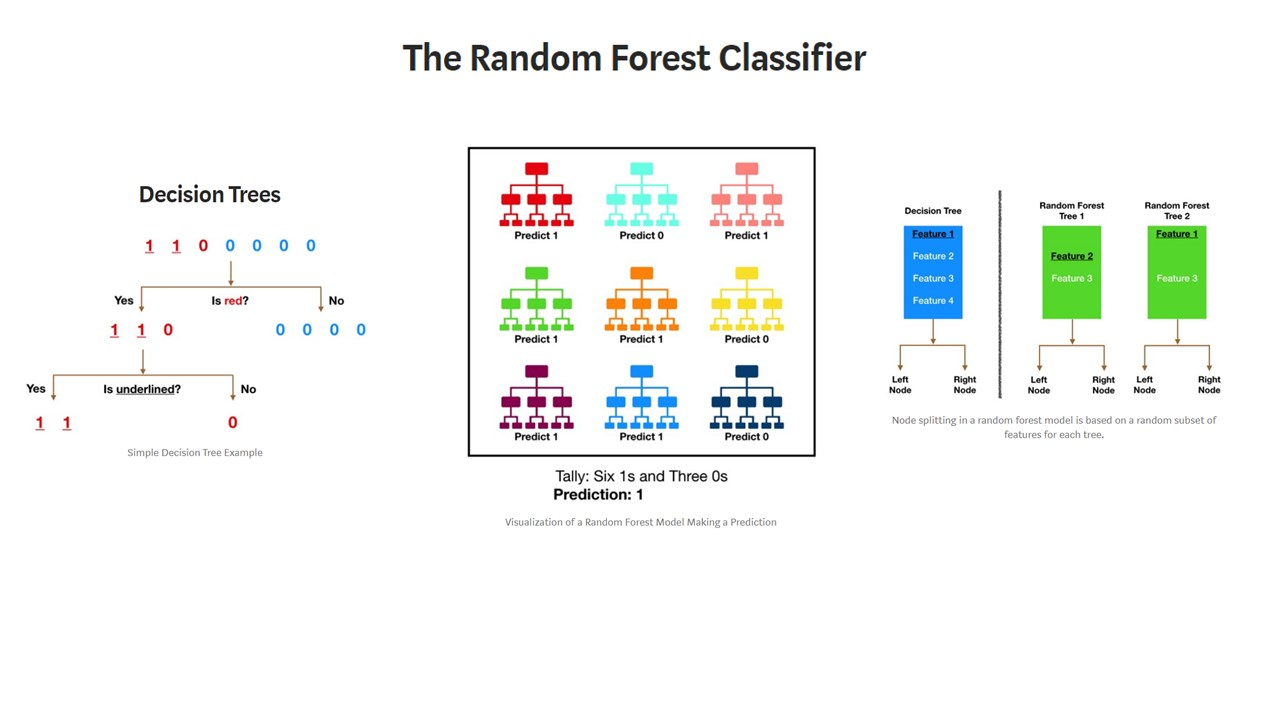


# **6. Dimensionality Reduction: Principal component analysis (PCA)**

In a nutshell, PCA aims to find the directions of maximum variance in highdimensional
data and projects the data onto a new subspace with equal or fewer
dimensions than the original one. The orthogonal axes (principal components) of
the new subspace can be interpreted as the directions of maximum variance given
the constraint that the new feature axes are orthogonal to each other, as illustrated
in the following figure:

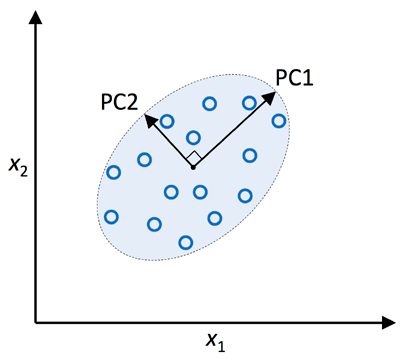

In the preceding figure, X1 and X2 are the original feature axes, and PC1 and PC2 are
the principal components. For more see [this](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

In [23]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [9]:
#To show the explain variance ratio in order for each components
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

print(X_train_pca.shape, X_train_std.shape)

NameError: ignored

In [10]:
# Only select the top 2 components: (n_components=2)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

NameError: ignored

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [12]:
# Train the model

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Training Data')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

NameError: ignored

In [13]:
#Test the model using testing data

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Test Data')
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

NameError: ignored

After we plot the decision regions for the test dataset by executing the preceding code,
we can see that logistic regression performs quite well on this small two-dimensional
feature subspace and only misclassifies a few examples in the test dataset

# **7. Building a Pipeline**

Pipeline allows us to fit a model including an arbitrary number of transformation
steps and apply it to make predictions about new data.

We can think of a Pipeline as a meta-estimator or wrapper around
the individual transformers and estimators. If we call the fit method of Pipeline,
the data will be passed down a series of transformers via fit and transform calls
on these intermediate steps until it arrives at the estimator object (the final element
in a pipeline). The estimator will then be fitted to the transformed training data.

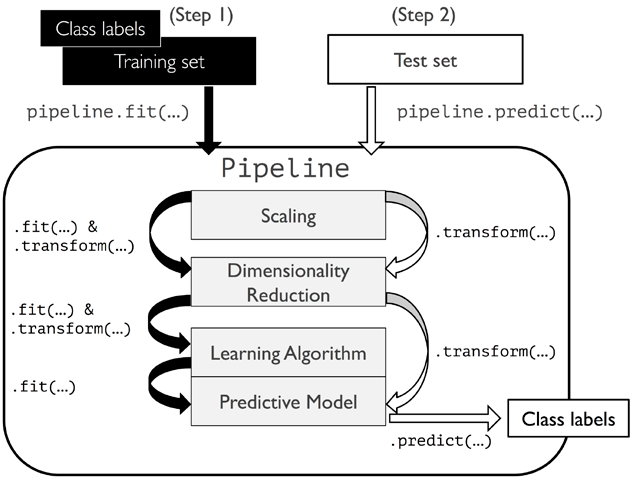

In [14]:
import pandas as pd

# We'll use the fanous breast cancer data set. The data dictionary is available here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

print(df.head())
print(df.shape)

         0  1      2      3       4   ...      27      28      29      30       31
0    842302  M  17.99  10.38  122.80  ...  0.6656  0.7119  0.2654  0.4601  0.11890
1    842517  M  20.57  17.77  132.90  ...  0.1866  0.2416  0.1860  0.2750  0.08902
2  84300903  M  19.69  21.25  130.00  ...  0.4245  0.4504  0.2430  0.3613  0.08758
3  84348301  M  11.42  20.38   77.58  ...  0.8663  0.6869  0.2575  0.6638  0.17300
4  84358402  M  20.29  14.34  135.10  ...  0.2050  0.4000  0.1625  0.2364  0.07678

[5 rows x 32 columns]
(569, 32)


In [30]:
#Partitioning X and Y
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

#Partitioning training and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)
    
#Chain the StandardScaler, PCA, and LogisticRegression objects in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


# *Including K-fold Cross-Validation in a Pipeline*

In k-fold cross-validation, we randomly split the training dataset into k folds without
replacement, where k – 1 folds are used for the model training, and one fold is used
for performance evaluation. This procedure is repeated k times so that we obtain k
models and performance estimates.

We then calculate the average performance of the models based on the different,
independent test folds to obtain a performance estimate

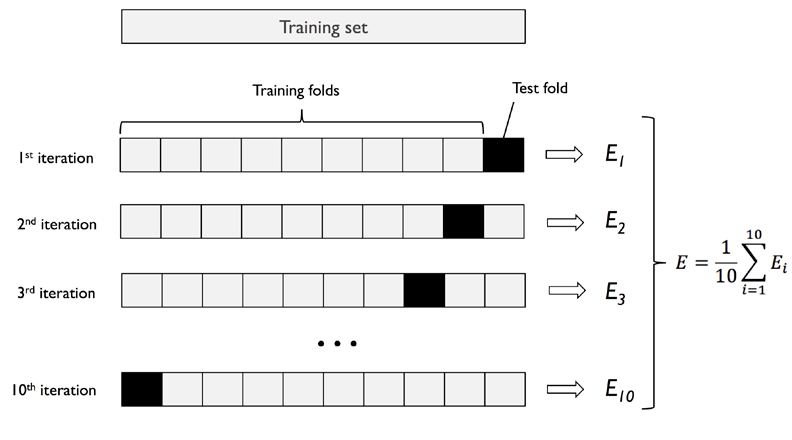

In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             n_jobs=1)

print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [0.92307692 1.         0.92307692 1.         1.         0.91666667
 0.91666667 0.91666667 1.         1.        ]
CV accuracy mean:0.9596153846153846 and std:0.04044561937012143


# **8. Learning and Validation curves**

If a model is too complex for a given training dataset (there are too many degrees of freedom or parameters in this model) the model tends to overfit the training data and does not generalize well to unseen data. Often, it can help to collect more training examples to reduce the degree of overfitting.

However, in practice, it can often be very expensive or simply not feasible to collect more data. By plotting the model training and validation accuracies as functions of the training dataset size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem. But before we discuss how to plot learning curves in scikit-learn, let's discuss those two common model issues by walking through the following illustration:

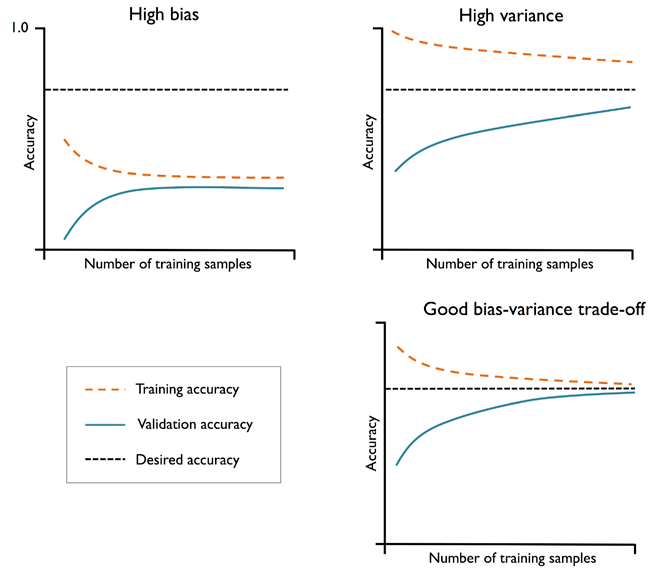

The graph in the upper-left shows a model with high bias. This model has both low
training and cross-validation accuracy, which indicates that it underfits the training
data. Common ways to address this issue are to increase the number of parameters
of the model.

The graph in the upper-right shows a model that suffers from high variance, which
is indicated by the large gap between the training and cross-validation accuracy.
To address this problem of overfitting, we can collect more training data, reduce
the complexity of the model, or increase the regularization parameter



In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', max_iter=5000,random_state=0))])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.title('Learning Curve')
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

NameError: ignored

In [16]:
# Now, investigate effect of regularization using the c, an inverse measure of the strength of regularization in logistic regression
# That is, high values of c low regularization (less mitigation of overfitting), low values of c mean high regularization (more mitigation of overfitting)
# For notes on regularization, see this: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
# L1 regularization (Lasso regression). Shrinks less importance model feature coefficients to zero. Estimates the median of the data.
# L2 regularization (Ridge regression). Estimates the mean of the data.

from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

NameError: ignored

# **9. Grid Search**

The grid search approach is quite simple: it's a brute-force exhaustive search
paradigm where we specify a list of values for different hyperparameters, and
the computer evaluates the model performance for each combination to obtain
the optimal combination of values from this set.

In [34]:
#Example using kNN, and searching over the value of k
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('sc', StandardScaler()),     
    ('knn', KNeighborsClassifier(algorithm='brute'))])

params = {'knn__n_neighbors': [3, 5, 7, 9, 11]} # usually odd numbers

clf = GridSearchCV(estimator=pipe,           
                      param_grid=params, 
                      cv=5,
                      return_train_score=True) # Turn on cv train scores
clf = clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)


# knn = KNeighborsClassifier(algorithm='auto')
# pipe_kNN = make_pipeline(StandardScaler(),knn)
# params = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 21]} # use odd numbers to avoid ties!        

# #initialized a GridSearchCV object from the sklearn model_selection
# gs = GridSearchCV(estimator=pipe_kNN, param_grid=params, cv=5, refit=True, n_jobs=-1)
# gs = gs.fit(X_train, y_train)

# # After we used the training data to perform the grid search, we obtained the score
# # of the best-performing model via the best_score_ attribute and looked at its
# # parameters, which can be accessed via the best_params_ attribute.
# print(gs.best_score_)
# print(gs.best_params_)

0.9701288619779538
{'knn__n_neighbors': 7}


In [35]:
# Example using an SVM pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

#set the param_grid parameter of GridSearchCV to a list of dictionaries to specify the parameters that we'd want to tune.

# For the linear SVM, we only evaluate the inverse regularization parameter, C; 
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},            
#For the RBF kernel SVM, we tuned both the svc__C and svc__gamma
#parameters. Note that the svc__gamma parameter is specific to kernel SVMs.              
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

#initialized a GridSearchCV object from the sklearn model_selection
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, cv=5, refit=True, n_jobs=-1)
gs = gs.fit(X_train, y_train)

# After we used the training data to perform the grid search, we obtained the score
# of the best-performing model via the best_score_ attribute and looked at its
# parameters, which can be accessed via the best_params_ attribute.
print(gs.best_score_)
print(gs.best_params_)

0.9802197802197803
{'svc__C': 1.0, 'svc__kernel': 'linear'}


In [36]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


# **10. Confusion Matrix & ROC/AUC**

A confusion matrix is simply a square matrix that reports the counts of the true
positive (TP), true negative (TN), false positive (FP), and false negative (FN)
predictions of a classifier, as shown in the following figure:

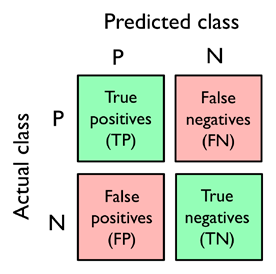

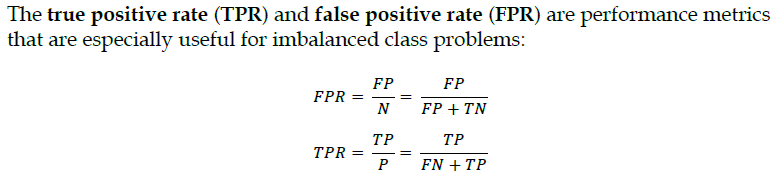

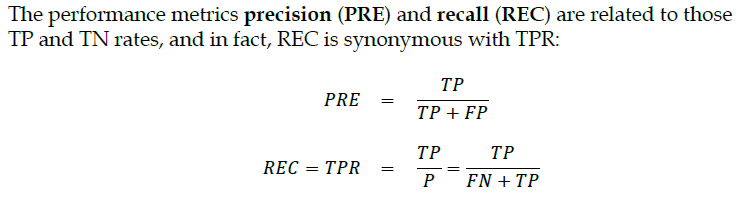


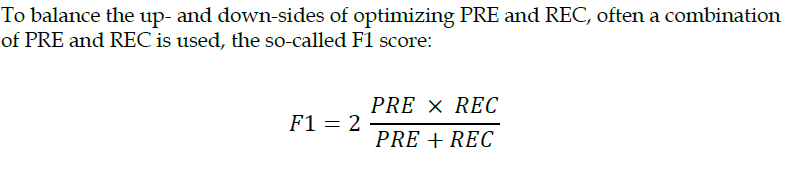


## *ROC-AUC curves*


Receiver operating characteristic (ROC) graphs are useful tools to select models for
classification based on their performance with respect to the FPR and TPR.

The diagonal of
a ROC graph can be interpreted as random guessing, and classification models that
fall below the diagonal are considered as worse than random guessing. A perfect
classifier would fall into the top-left corner of the graph with a TPR of 1 and an FPR
of 0. Based on the ROC curve, we can then compute the so-called ROC area under
the curve (ROC AUC) to characterize the performance of a classification model.

For more on ROC curves, see this: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

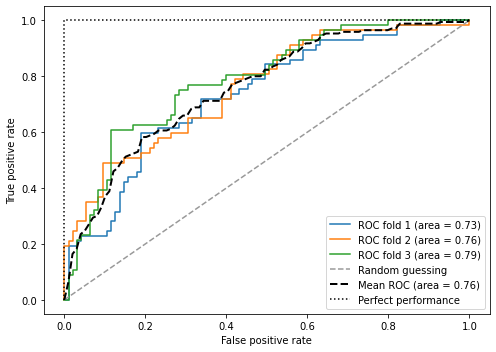

In [37]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

The
resulting ROC curve indicates that there is a certain degree of variance between the
different folds, and the average ROC AUC (0.76) falls between a perfect score (1.0)
and random guessing (0.5)

## **11. SMOTE**

Class imbalance is a quite common problem when working with real-world
data—examples from one class or multiple classes are over-represented in a dataset.

Synthetic Minority Oversampling
Technique (SMOTE) is the most widely used algorithm for
synthetic training data generation.

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

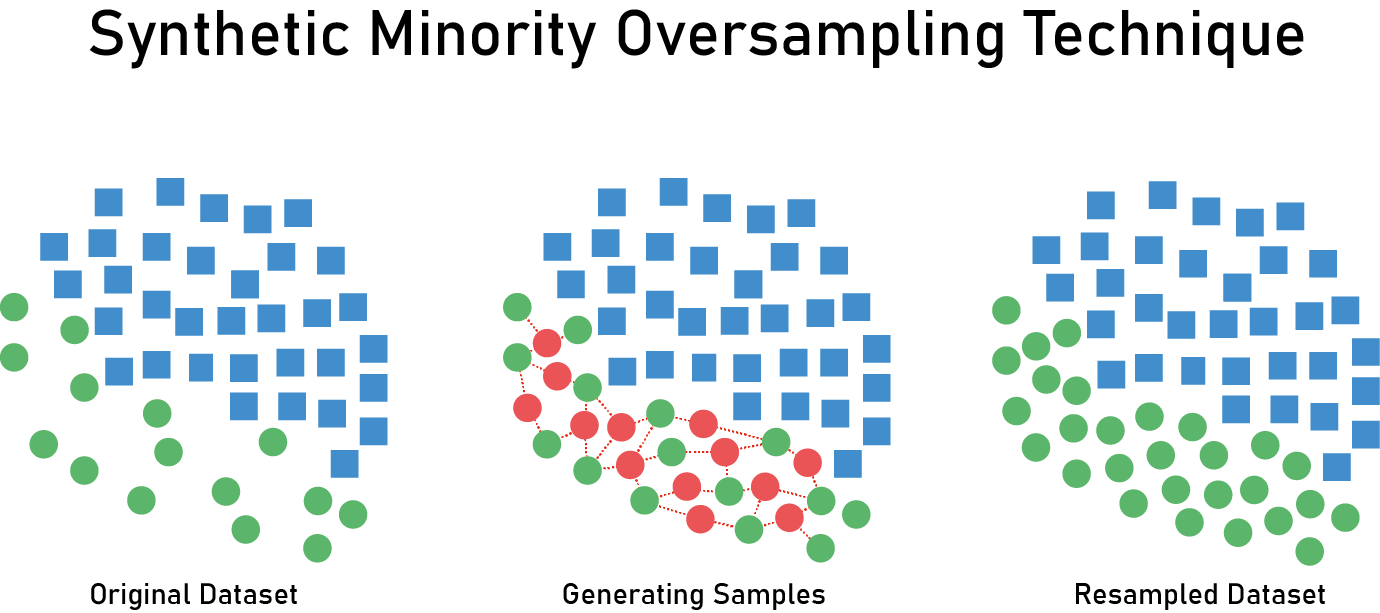
SOurce: https://medium.com/analytics-vidhya/bank-data-smote-b5cb01a5e0a2

In [41]:
!pip install imbalanced-learn

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_ = "/content/drive/My Drive/Colab Notebooks/Big Data ML/creditcard.csv"
df = pd.read_csv(file_, warn_bad_lines=None) # read in csv file
# print out shape
print(df.shape)

# print out sample of data
print(df.head())

# # check for NaNs
print(df.info())
print(list(df))
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']
print(len(y), y.sum())  # only 492 instances havee Class = 1


Mounted at /content/drive
(284807, 31)
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      2848

In [43]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [39]:
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_sample(X, y)

print(X_res.shape, y_res.shape, X.shape, y.shape)
print(len(y_res),y_res.sum())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.4.3
(568630, 29) (568630,) (284807, 29) (284807,)
568630 284315


In [40]:
print([y.sum(), len(y), y.sum()/len(y)])
print([y_res.sum(), len(y_res),y_res.sum()/len(y_res) ])

[492, 284807, 0.001727485630620034]
[284315, 568630, 0.5]


#**12. Ensembles**
See these slides: https://docs.google.com/presentation/d/1ppHLbGSi0BF-YuKFUCh0VSTUI8k-9GvO8-bChW9ATLc/edit?usp=sharing

In [41]:
#Ensembles


!pip install vecstack
!pip install lightgbm
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking


link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alcalinity of ash' ,'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',     'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']
df = pd.read_csv(link, header=None, names=names)
df.sample(5)

y = df[['Class']]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3),
          
    LGBMClassifier() 
]

S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
                           mode='oof_pred_bag', 
                           needs_proba=False,
                           save_dir=None, 
                           metric=accuracy_score, 
                           n_folds=4, 
                           stratified=True,
                           shuffle=True,  
                           random_state=0,    
                           verbose=2)

#XGBoost model at the 2nd level
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('XGBoostFinal prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=fa4dde6824c65db98f794595d53b7e2467b701a43fa08c3554e4319da518bd6e
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.69444444]
    fold  1:  [0.63888889]
    fold  2:  [0.62857143]
    fold  3:  [0.65714286]
    ----
    MEAN:     [0.65476190] + [0.02509117]
    FULL:     [0.65492958]

model  1:     [RandomForestClassifier]
    fold  0:  [0.97222222]
    fold  1:  [0.97222222]
    fold  2:  [0.97142857]
    fold  3:  [1.00000000]
    ----
    MEAN:     [0.97896825] + [0.01214701]
    FULL:     [0.97887324]

model  2:     [XGBClassifier]
    fold  0:  [0.94444444]
    fold  1:  [0.94444444]
    fold  2:  [0.97142857]
    fold  3:  [1.00000000]
    ----
    MEAN:     [0.96507937] + [0.02297479]
    FULL:     [0.96478873]

model  3:     [LGBMClassifier]
    fold  0:  [0.91666667]
    fold  1:  [0.94444444]
    fold  2:  [0.97142857]
    fold  3:  [1.00000000]
    ----
    MEAN:     [0.95813492] + [0.03096955]
    FULL:     [

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




---



# **Assignment 4**

## Part I - Handling Categorical Data

Work through the steps in **2. Categorical Data**
for the following dataframe.

* 2.1. [5 points] Map ordinal features: shirt_size to numbers
* 2.2. [5 points] One-hot encode class_label 
* 2.3. [5 points] Use Get_Dummies to encode shirt_size

```
df = pd.DataFrame([['yellow','XL', 1085.07, 'classC'],
                   ['blue',  'L',  339.61,  'classB'],
                   ['green', 'L',  400.0,   'classB'],
                   ['green', 'M',  238,     'classB'],
                   ['grey',  'S',  52.99,   'classA']])

df.columns = ['color', 'shirt_size', 'price', 'class_label']
```

In [18]:
df = pd.DataFrame([['yellow','XL', 1085.07, 'classC'],
                   ['blue',  'L',  339.61,  'classB'],
                   ['green', 'L',  400.0,   'classB'],
                   ['green', 'M',  238,     'classB'],
                   ['grey',  'S',  52.99,   'classA']])

df.columns = ['color', 'shirt_size', 'price', 'class_label']

mapping_size = {
    'S': 1,
    'M': 2,
    'L': 3,
    'XL': 4
}

df['shirt_size'] = df['shirt_size'].map(mapping_size)
df

,color,shirt_size,price,class_label
0,yellow,4,1085.07,classC
1,blue,3,339.61,classB
2,green,3,400.00,classB
3,green,2,238.00,classB
4,grey,1,52.99,classA


In [19]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'shirt_size', 'price', 'class_label']].values
class_ohe = OneHotEncoder()
class_trans_arr = class_ohe.fit_transform(X[:,3].reshape(-1,1)).toarray() 
df[['class_a', 'class_b', 'class_c']] = class_trans_arr
df = df.drop(['class_label'], axis=1)
df = pd.get_dummies(df[df.columns]) 
df


,shirt_size,price,class_a,class_b,class_c,color_blue,color_green,color_grey,color_yellow
0,4,1085.07,0.0,0.0,1.0,0,0,0,1
1,3,339.61,0.0,1.0,0.0,1,0,0,0
2,3,400.00,0.0,1.0,0.0,0,1,0,0
3,2,238.00,0.0,1.0,0.0,0,1,0,0
4,1,52.99,1.0,0.0,0.0,0,0,1,0


#  Well, in this task I have used get_dummies to encode color, not size, because if I do not do that c_transf.fit_transform(X).astype(float) will not work, because feature color still will be string and transformation cannot be performed and also this would be only unprocessed feature, while size was encoded in previous step


## Part II - Build and Present

In this part, we will use the Credit Card dataset (creditcard.csv). You will present your work in a ppt with visuals. Turn in your JupyterNotebook and ppt for your grade. The first time you will not using SMOTE and the second time you will use SMOTE. Present and comment on the differences, if any. Which model would you put into production and why? 

1. Read in the dataset and create a DataFrame. 

2. [15 points] Do some **Exploratory Data Analysis (EDA)**. Use pictures, graphs, descriptive statistics, correlations, etc. to tell a story about the data. Is your response (Class) balanced? Is your data well behaved? Think about if you may need to do any feature [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
) such as StandardScaler(), MinMaxScaler() or others. 

3. [10 points] Display the distribution of your **target/response variable**. What is the number of 0s and 1s? If a naive model were to always guess 0, what would the accuracy be? 

4. [5 points] Now, **split** your data into **training and testing set** with 80% for training and 20% for testing. 

5. [5 points] First, employ the **RandomForest classifier** to get some sense of a ballpark accuracy that you could get out of this data set. 

6. [10 points] Use **k-Fold Cross Validation** to split dataset into 5 folds and print CV accuracy scores. Does your initial accuracy measure appear reasonable? Set up a pipeline and start to add more complexity. What happens when you add PCA into your pipeline?

7. [10 points] Examine the cross validation scores for several algorithms. Which are most promising? Why? 

8. [10 points] Fine-tune your top algorithm using **GridSearch** to determine the best hyper parameters, recalculate the cross validation scores. Plot ROC/AUC for your top algorithm. How well does it perform? Report the confusion matrix results. 

9. [10 points] Determine your best algorithm and present it in your ppt. What did you consider? What did you learn? 

10. [5 points] Redo analysis now using **SMOTE**.

11. [5 points] Gather all your results and put them into a beautiful ppt! Be prepared to present a business case on your work, defend your procedures, and share lessons learned. 

12. [0 points] Think about how any **biases** could have crept into your analysis. Is your model bias free? Was there any leakage of information or **lookahead biases** in your process? Or was it 100% bias free? 

*Feel free to review any blogs and other works. Please (re)code everything yourself, but feel free to discuss the ideas with others.


1. Read Dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

file_ = "/content/drive/My Drive/Colab Notebooks/Big Data ML/creditcard.csv"
df = pd.read_csv(file_, warn_bad_lines=None) # read in csv file


Mounted at /content/drive


2. Exploratory Data Analysis (EDA)

In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [51]:
df.shape

(284807, 31)

In [52]:
df.isna().sum().T

#No missing data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
import seaborn as sns
print(df.corr())


def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))



            Time            V1            V2  ...           V28    Amount     Class
Time    1.000000  1.173963e-01 -1.059333e-02  ... -9.412688e-03 -0.010596 -0.012323
V1      0.117396  1.000000e+00  4.697350e-17  ...  9.820892e-16 -0.227709 -0.101347
V2     -0.010593  4.697350e-17  1.000000e+00  ... -3.676415e-16 -0.531409  0.091289
V3     -0.419618 -1.424390e-15  2.512175e-16  ...  7.726948e-16 -0.210880 -0.192961
V4     -0.105260  1.755316e-17 -1.126388e-16  ... -5.863664e-17  0.098732  0.133447
V5      0.173072  6.391162e-17 -2.039868e-16  ... -3.299167e-16 -0.386356 -0.094974
V6     -0.063016  2.398071e-16  5.024680e-16  ...  4.813155e-16  0.215981 -0.043643
V7      0.084714  1.991550e-15  3.966486e-16  ... -6.836764e-17  0.397311 -0.187257
V8     -0.036949 -9.490675e-17 -4.413984e-17  ... -4.484325e-16 -0.103079  0.019875
V9     -0.008660  2.169581e-16 -5.728718e-17  ...  9.146779e-16 -0.044246 -0.097733
V10     0.030617  7.433820e-17 -4.782388e-16  ... -1.515934e-16 -0.101502 -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f006c2e6990>,
      dtype=object)

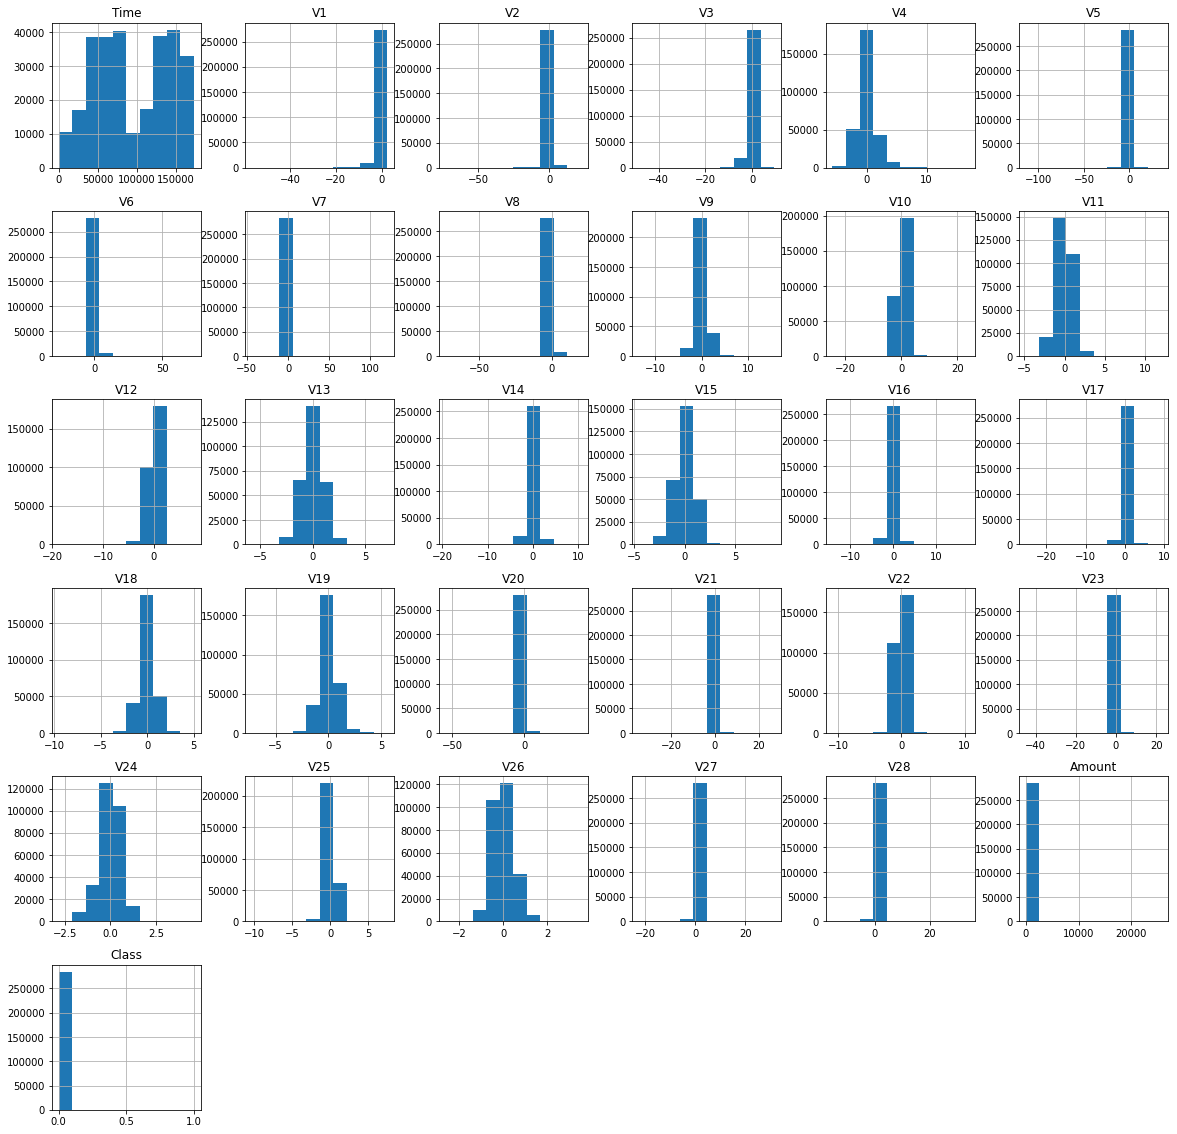

In [45]:
df.hist(grid=True,figsize=(20,20))



According to the hists and df summary above, most feature values are not skewed and tend to have a mean near 0 and std near 1.
Considering that there is no missing values, and the lack of skewness (except in target class) we can state that dataset is well-behaved

The exceptions are time and amount, because of their values being much different compared to factors provided (V1...V28) it would make sense to use StandardScaler

Why StandardScaler? Because we do not have certain boundaries for our values interval and our data seems to be following normal distribution for most features

Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.



3. *Display the distribution of your target/response variable. What is the number of 0s and 1s? If a naive model were to always guess 0, what would the accuracy be?*

Fraud transactions:  492 0.1727485630620034 %
Non fraud transactions:  284315 99.827251436938 %


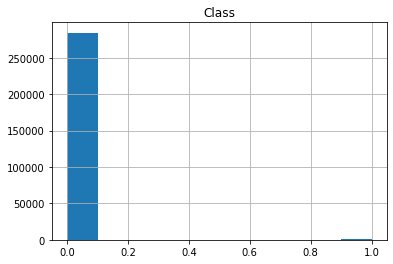

In [46]:
df.hist('Class')
print('Fraud transactions: ', df[df['Class'] == 1]['Class'].count(), df[df['Class'] == 1]['Class'].count()*100/df.shape[0],'%')
print('Non fraud transactions: ', df[df['Class'] != 1]['Class'].count(), df[df['Class'] != 1]['Class'].count()*100/df.shape[0],'%')

# The dataset is extremely unbalanced
# Considering such low number of fraudulent transactions the naive model (that will always guess 0) will perform extremely good with the accuracy close to 1 - 0.998

*4. Now, split your data into training and testing set with 80% for training and 20% for testing.*

In [115]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1:].values


X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y)

Scaling

In [116]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

*5. First, employ the RandomForest classifier to get some sense of a ballpark accuracy that you could get out of this data set.*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 1) V17                            0.153639
 2) V14                            0.139671
 3) V12                            0.131762
 4) V10                            0.080605
 5) V16                            0.074170
 6) V11                            0.064835
 7) V9                             0.037491
 8) V18                            0.034615
 9) V4                             0.026211
10) V7                             0.025949
11) V26                            0.018928
12) V21                            0.016578
13) V3                             0.015001
14) V1                             0.013268
15) V6                             0.013019
16) V20                            0.012701
17) V2                             0.012531
18) Time                           0.012350
19) Amount                         0.011252
20) V8                             0.011152
21) V27                            0.011016
22) V5                             0.010968
23) V19                         

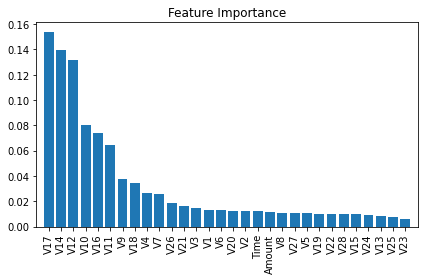

In [117]:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

feat_labels = df.columns[:-1]

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train_std, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_std.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_std.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
plt.show()

Confusion matrix, without normalization for TEST data
[[56861     3]
 [   28    70]]
Normalized confusion matrix
[[1.00e+00 5.28e-05]
 [2.86e-01 7.14e-01]]
Accuracy =  0.9994616293903538


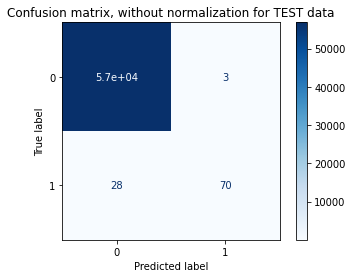

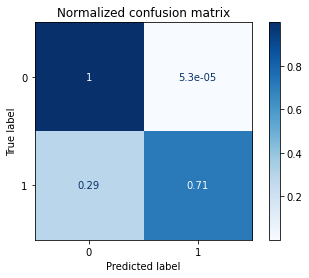

In [118]:
from sklearn.metrics import plot_confusion_matrix

def confusion(classifier, X_test, y_test, x_ax, y_ax):
  np.set_printoptions(precision=2)
  # Plot non-normalized confusion matrix
  titles_options = [("Confusion matrix, without normalization for TEST data", None),
                  ("Normalized confusion matrix", 'true')]
  for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[x_ax, y_ax],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

confusion(forest, X_test_std, y_test, '0','1')
print('Accuracy = ', (108+85289)/(108+85289+46))
#The accuracy is 99.9%; however considering how dataset is unbalanced, we are more interested in the presicion metric
# The precision of 73% is not bad for an initial estimation

6. *Use k-Fold Cross Validation to split dataset into 5 folds and print CV accuracy scores. Does your initial accuracy measure appear reasonable? Set up a pipeline and start to add more complexity. What happens when you add PCA into your pipeline?*



In [21]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=forest,
                             X=X_train_std,
                             y=y_train.ravel(),
                             cv=5,
                             n_jobs=1)

print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))



# The accuracy measure appear resonable, because of how imbalanced the dataset is

CV accuracy scores: [1. 1. 1. 1. 1.]
CV accuracy mean:0.9995479382913821 and std:5.1183496630097684e-05


Test Accuracy: 0.998
Confusion matrix, without normalization for TEST data
[[56848    16]
 [   96     2]]
Normalized confusion matrix
[[1.00e+00 2.81e-04]
 [9.80e-01 2.04e-02]]


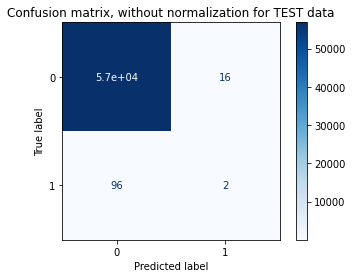

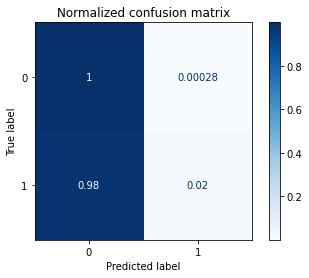

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_forest = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        forest)

pipe_forest.fit(X_train, y_train.ravel())
y_pred = pipe_forest.predict(X_test_std)
print('Test Accuracy: %.3f' % pipe_forest.score(X_test_std, y_test.ravel()))
confusion(pipe_forest, X_test_std, y_test, '0','1')

# The accuracy decreases insignificantly;
#However, model performs much worse in detecting fraudulent transactions (TP rate), 0 correct predictions

7. *Examine the cross validation scores for several algorithms. Which are most promising? Why?*




Logistic Regression

In [25]:
scores = cross_val_score(estimator=LogisticRegression(random_state = 0,
                                                      solver='saga',
                                                      multi_class='auto',
                                                      max_iter = 10000),
                             X=X_train_std,
                             y=y_train.ravel(),
                             cv=5,
                             n_jobs=1)

print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [1. 1. 1. 1. 1.]
CV accuracy mean:0.9992099892470758 and std:6.509862834028499e-05


SVC

In [49]:
from sklearn import tree
from sklearn.svm import SVC

scores = cross_val_score(estimator=SVC(gamma='auto',kernel='rbf'),
                             X=X_train_std,
                             y=y_train.ravel(),
                             cv=5,
                             n_jobs=1)

In [50]:
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [0.99942944 0.99920999 0.99925388 0.99938555 0.99942944]
CV accuracy mean:0.9993416577058966 and std:9.206336309069537e-05


Gaussian NB

In [35]:
from sklearn.naive_bayes import GaussianNB
gauss_classifier = GaussianNB()

scores = cross_val_score(estimator=gauss_classifier,
                             X=X_train_std,
                             y=y_train.ravel(),
                             cv=5,
                             n_jobs=1)

print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [0.97568522 0.97752858 0.97908666 0.9780772  0.97845026]
CV accuracy mean:0.9777655862538129 and std:0.0011571685913919784


SGD

In [79]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores = cross_val_score(estimator=clf,
                             X=X_train_std,
                             y=y_train.ravel(),
                             cv=5,
                             n_jobs=1)

print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [1. 1. 1. 1. 1.]
CV accuracy mean:0.9990914876341372 and std:6.299326337817353e-05


Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(estimator=DecisionTreeClassifier(),
                             X=X_train_std,
                             y=y_train.ravel(),
                             cv=5,
                             n_jobs=1)
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))


CV accuracy scores: [0.99905638 0.99892471 0.99920999 0.9991661  0.99923193]
CV accuracy mean:0.9991178213259013 and std:0.00011394373355346648


Comparing confusion matrices

Logistic regression
Confusion matrix, without normalization for TEST data
[[56853    11]
 [   35    63]]
Normalized confusion matrix
[[1.00e+00 1.93e-04]
 [3.57e-01 6.43e-01]]
SVC
Confusion matrix, without normalization for TEST data
[[56862     2]
 [   37    61]]
Normalized confusion matrix
[[1.00e+00 3.52e-05]
 [3.78e-01 6.22e-01]]
Gaussian Naive Bayes
Confusion matrix, without normalization for TEST data
[[55621  1243]
 [   18    80]]
Normalized confusion matrix
[[0.98 0.02]
 [0.18 0.82]]
Decision Tree
Confusion matrix, without normalization for TEST data
[[56838    26]
 [   30    68]]
Normalized confusion matrix
[[1.00e+00 4.57e-04]
 [3.06e-01 6.94e-01]]
SGD
Confusion matrix, without normalization for TEST data
[[56853    11]
 [   43    55]]
Normalized confusion matrix
[[1.00e+00 1.93e-04]
 [4.39e-01 5.61e-01]]


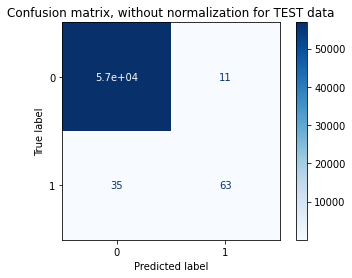

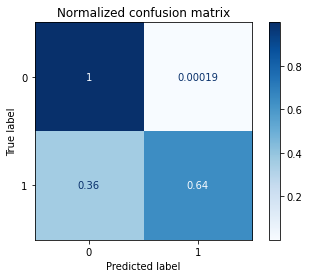

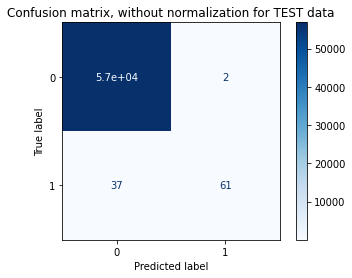

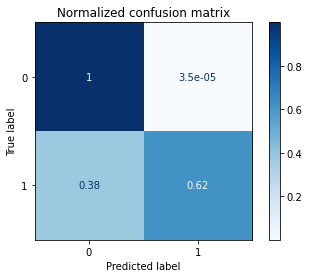

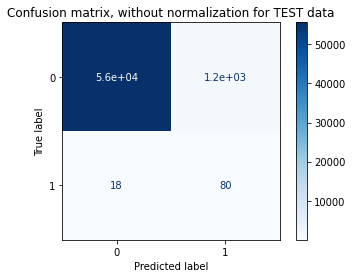

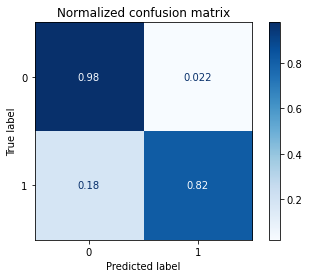

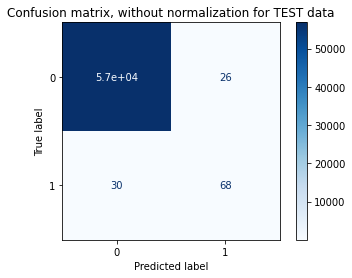

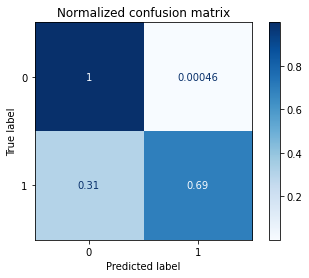

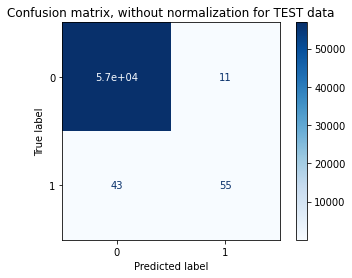

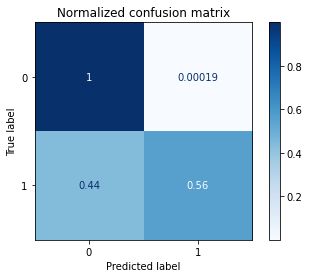

In [120]:
from sklearn.svm import SVC
classifiers = {'Logistic regression': LogisticRegression(random_state = 0,
                                                      solver='saga',
                                                      multi_class='auto',
                                                      max_iter = 10000),
               'SVC': SVC(gamma='auto',kernel='rbf'),
               'Gaussian Naive Bayes': gauss_classifier,
               'Decision Tree': DecisionTreeClassifier(),
               'SGD': SGDClassifier(max_iter=1000)
}
               
for label, clas in classifiers.items():
  print(label)
  clas.fit(X_train_std, y_train.ravel())
  confusion(clas, X_test_std, y_test, '0','1')

8. *Fine-tune your top algorithm using GridSearch to determine the best hyper parameters, recalculate the cross validation scores. Plot ROC/AUC for your top algorithm. How well does it perform? Report the confusion matrix results.*




In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

#pipe_forest = make_pipeline(StandardScaler(),
#                        PCA(n_components=2),
#                        forest)


#cv = list(StratifiedKFold(n_splits=5).split(X_train, y_train)) #Reduced  run faster
#train_reduced, test_reduced = cv[0]
#X_train_reduced = X_train[train_reduced]
#y_train_reduced = y_train[train_reduced]
gnb_pipe = Pipeline([('sc',StandardScaler()),
                        ('gnb', gauss_classifier)])

param_grid = [{ 
    'gnb__var_smoothing': np.logspace(0,-9, num=100)
}]

clf = GridSearchCV(estimator=gnb_pipe,           
                      param_grid=param_grid, 
                      cv=3,
                      return_train_score=True) 
clf = clf.fit(X_train, y_train.ravel()) #
print(clf.best_score_)
print(clf.best_params_)


0.988527295260777
{'gnb__var_smoothing': 1.0}


In [144]:
scores = cross_val_score(estimator=GaussianNB(var_smoothing=1),
                             X=X_train_std,
                             y=y_train.ravel(),
                             cv=5,
                             n_jobs=1)
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [0.99 0.99 0.99 0.99 0.99]
CV accuracy mean:0.9886852904386755 and std:0.0007743229902873425


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization for TEST data
[[56229   635]
 [   25    73]]
Normalized confusion matrix
[[0.99 0.01]
 [0.26 0.74]]


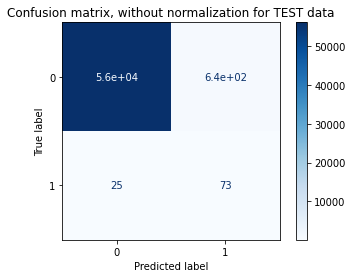

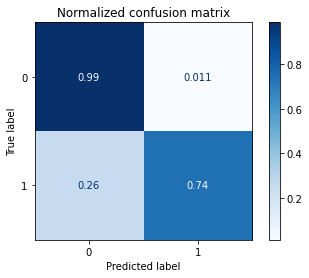

In [145]:
  confusion(GaussianNB(var_smoothing=1).fit(X_train_std, y_train), X_test_std, y_test, '0','1')

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

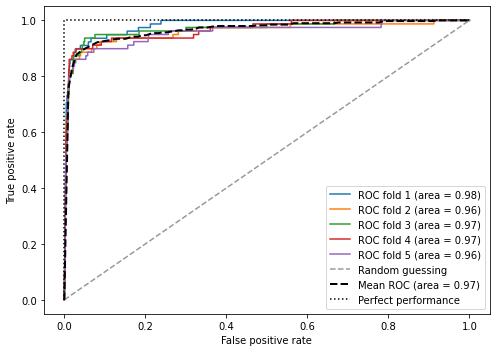

In [146]:
from sklearn.model_selection import StratifiedKFold
from numpy import interp
from sklearn.metrics import roc_curve, auc
cv = list(StratifiedKFold(n_splits=5).split(X_train_std, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = GaussianNB(var_smoothing=1).fit(X_train_std[train],
                         y_train[train]).predict_proba(X_train_std[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

9. *Determine your best algorithm and present it in your ppt. What did you consider? What did you learn?*

In [76]:
# Actually, my best performing algorithm is RF; however, due to the fact that I could not finish grid search of RF parameters, I have chosen to proceed with Gaussian NB
# While choosing from the rest (not RF) algorithms, apart from general accuracy, I have paid more attention at TP and FN rate, the first one should be as high as possible,
# while the other one as low as possible, as in our task of fraud detection FP is much less costly than FN. 
# Choosing the best algorithm requires compromise between precision and specificity and overall accuracy in which business problem setting plays major role

10. [5 points] Redo analysis now using **SMOTE**.





In [150]:
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_sample(X_train, y_train)

print(X_smote.shape, y_smote.shape, X_train, y_train)
print(len(y_smote),y_smote.sum())


0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(454902, 30) (454902,) [[ 3.84e+04  1.04e+00  3.19e-01 ...  1.66e-03  3.79e-02  4.97e+01]
 [ 2.26e+04 -1.67e+00  8.08e-01 ... -5.96e-01 -2.20e-01  1.69e+01]
 [ 2.43e+03 -3.24e-01  6.02e-01 ...  2.29e-01 -2.16e-02  1.00e+00]
 ...
 [ 1.64e+05  8.28e-01 -2.65e+00 ... -2.58e-01  3.79e-02  7.48e+02]
 [ 1.23e+05 -1.52e+00 -6.29e+00 ... -3.29e-01  2.30e-01  1.77e+03]
 [ 4.34e+04 -1.61e+00  1.33e-01 ...  1.75e-01  9.20e-02  1.92e+02]] [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
454902 227451


In [154]:
print([y_train.sum(), len(y_train), y_train.sum()/len(y_train)])
print([y_smote.sum(), len(y_smote),y_smote.sum()/len(y_smote) ])

[394, 227845, 0.001729245759178389]
[227451, 454902, 0.5]


In [155]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test =\
    train_test_split(X_smote, y_smote, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y_smote)

In [156]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
X_smote_train_std = stdsc.fit_transform(X_smote_train)
X_smote_test_std = stdsc.transform(X_smote_test)

In [157]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=forest,
                             X=X_smote_train_std,
                             y=y_smote_train.ravel(),
                             cv=5,
                             n_jobs=1)

print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))



# I did not run this, becuase it took 30 mins, but I have just stopped it

KeyboardInterrupt: ignored

Confusion matrix, without normalization for TEST data
[[45480    11]
 [    0 45490]]
Normalized confusion matrix
[[1.00e+00 2.42e-04]
 [0.00e+00 1.00e+00]]


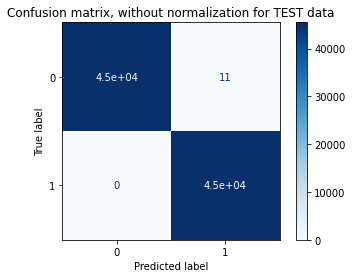

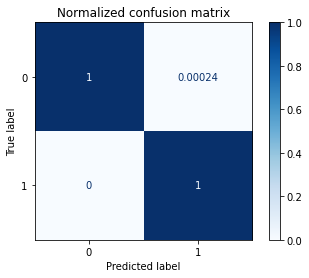

In [158]:
confusion(forest.fit(X_smote_train_std, y_smote_train), X_smote_test_std, y_smote_test, '0','1')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_forest = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        forest)

pipe_forest.fit(X_smote_train, y_smote_train.ravel())
y_pred = pipe_forest.predict(X_smote_test)
print('Test Accuracy: %.3f' % pipe_forest.score(X_smote_test, y_smote_test.ravel()))
confusion(pipe_forest, X_smote_test, y_smote_test, '0','1')

# I have skipped this step after smote because RF accuracy is very good and it takes so long to run

In [ ]:
for clas in classifiers:
  scores = cross_val_score(estimator=clas,
                             X=X_smote_train_std,
                             y=y_smote_train.ravel(),
                             cv=4,
                             n_jobs=1)

print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

Gaussian Naive Bayes
Confusion matrix, without normalization for TEST data
[[44453  1038]
 [ 5642 39848]]
Normalized confusion matrix
[[0.98 0.02]
 [0.12 0.88]]


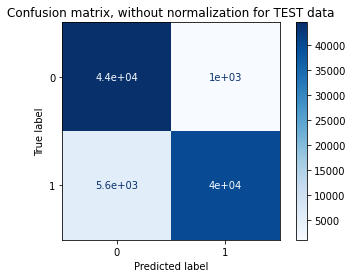

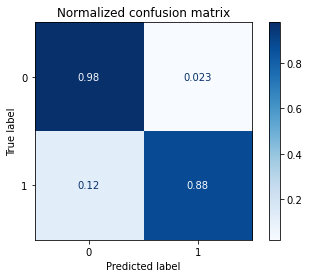

In [164]:
cv = list(StratifiedKFold(n_splits=10).split(X_smote_train, y_smote_train)) # Use reduced dataset to speed up the process
train_reduced, test_reduced = cv[0]
X_smote_train_reduced = X_smote_train[train_reduced]
y_smote_train_reduced = y_smote_train[train_reduced]
X_smote_test_reduced = X_smote_test[test_reduced]
y_smote_test_reduced = y_smote_test[test_reduced]


stdsc = StandardScaler()  
X_smote_train_std_reduced = stdsc.fit_transform(X_smote_train_reduced)
X_smote_test_std_reduced = stdsc.transform(X_smote_test_reduced)

for label, clas in classifiers.items():
  if label in ['Gaussian Naive Bayes']:
    print(label)
    clas.fit(X_smote_train_std, y_smote_train.ravel())
    confusion(clas, X_smote_test_std, y_smote_test, '0','1')
    scores = cross_val_score(estimator=clas,
                             X=X_smote_train_std,
                             y=y_smote_train.ravel(),
                             cv=3,
                             n_jobs=-1)


In [165]:
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93 0.93 0.93]
CV accuracy mean:0.9258520393162252 and std:0.0005168440507572458


In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA





gnb_pipe = Pipeline([('sc',StandardScaler()),
                        ('gnb', gauss_classifier)])

param_grid = [{ 
    'gnb__var_smoothing': np.logspace(0,-9, num=100)
}]


clf = GridSearchCV(estimator=gnb_pipe,           
                      param_grid=param_grid, 
                      cv=3,
                      return_train_score=True) 
clf = clf.fit(X_smote_train, y_smote_train.ravel())
print(clf.best_score_)
print(clf.best_params_)



0.9258520393162252
{'gnb__var_smoothing': 2.848035868435799e-06}


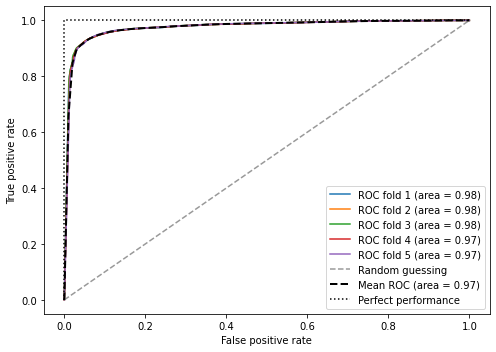

In [170]:
from sklearn.model_selection import StratifiedKFold
from numpy import interp
from sklearn.metrics import roc_curve, auc
cv = list(StratifiedKFold(n_splits=5).split(X_train_std, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = GaussianNB(var_smoothing=2.848035868435799e-06).fit(X_smote_train_std[train],
                         y_smote_train[train]).predict_proba(X_smote_train_std[test])

    fpr, tpr, thresholds = roc_curve(y_smote_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

Confusion matrix, without normalization for TEST data
[[54474  2390]
 [   17    81]]
Normalized confusion matrix
[[0.96 0.04]
 [0.17 0.83]]


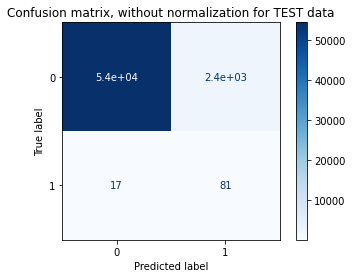

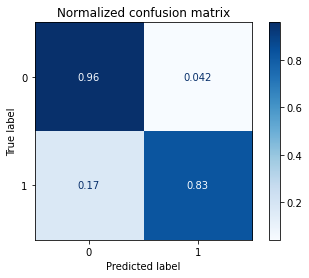

In [172]:
# Final test


confusion(clf, X_test_std, y_test, '0','1')







12. [0 points] Think about how any **biases** could have crept into your analysis. Is your model bias free? Was there any leakage of information or **lookahead biases** in your process? Or was it 100% bias free? 

I believe, there is no leakage of information within the process.
Speaking of biases, I think the main one is the fact that I incline to achive higher TP rate even if we have a higher FP rate because of our business problem statement